## Image Segmentation

Import openCV and matplotlib

In [1]:
import cv2
import matplotlib.pyplot as plt

Take a picture, read it with openCV. 

In [2]:
im=cv2.imread('./IMG.JPG')

Use cvtColor to convert the image to the BGR2RGB color space.

In [3]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#plt.imshow(im)

(4000, 6000, 3)


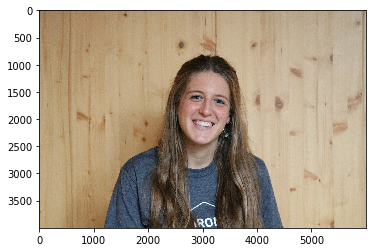

In [4]:
pic = plt.imread('./IMG.JPG')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [6]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

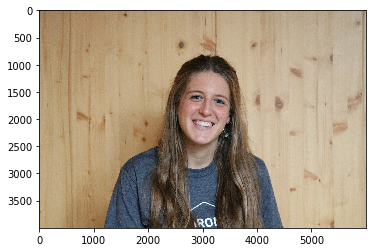

(6000, 4000)


In [7]:
# !wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./IMG.JPG')
plt.imshow(img); plt.show()
print(img.size)

In [8]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(500),
                 T.CenterCrop(500),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [9]:
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 500, 500])


In [10]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)

(500, 500)


In [11]:
# Define the helper function
def decode_segmap(image, nc=21):
   
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
   
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
     
  rgb = np.stack([r, g, b], axis=2)
  return rgb

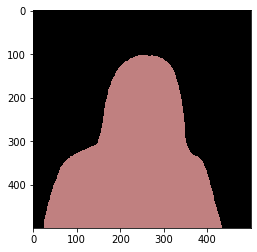

In [12]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [13]:
### 

In [14]:
def segment(net, path):
    img = Image.open(path)
    t=T.Compose([T.Resize(512)])
    img=t(img)
    plt.imshow(img); plt.axis('off'); plt.show()
    # Comment the Resize and CenterCrop for better inference results
    trf = T.Compose([T.ToTensor(), 
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.imshow(rgb); plt.axis('off'); plt.show()
    return img, rgb

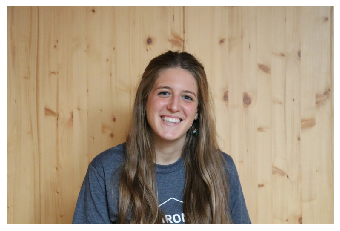

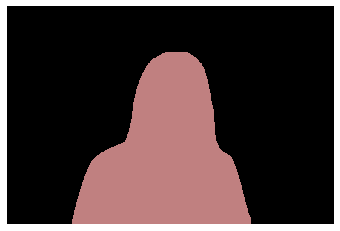

In [15]:
#!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
img, rgb=segment(fcn, './IMG.JPG')

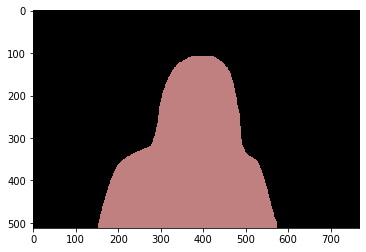

In [16]:
plt.imshow(rgb)

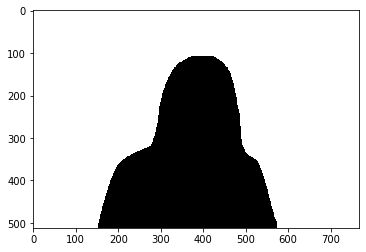

In [17]:
image_copy = rgb.copy()

black_pixels_mask = np.all(rgb == [0, 0, 0], axis=-1)

non_black_pixels_mask = np.any(rgb != [0, 0, 0], axis=-1)  
# or non_black_pixels_mask = ~black_pixels_mask

image_copy[black_pixels_mask] = [255, 255, 255]
image_copy[non_black_pixels_mask] = [0, 0, 0]

plt.imshow(image_copy)
plt.show()

In [39]:
img_np_front = np.array(img)

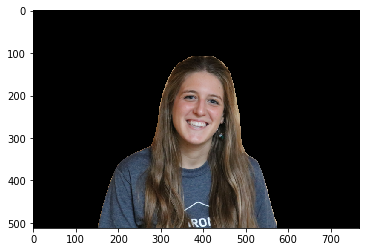

In [40]:
img_np_front[black_pixels_mask] = [0, 0, 0]
plt.imshow(img_np_front)

(512, 768, 3)


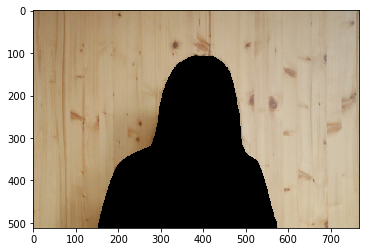

In [166]:
img_np_back = np.array(img)
img_np_back[non_black_pixels_mask] = [0, 0, 0]
print(img_np_back.shape)
plt.imshow(img_np_back)

In [21]:
import scipy.signal
import numpy as np

In [147]:
img_np_back[:,:,0]

array([[147, 146, 144, ..., 165, 174, 177],
       [145, 146, 145, ..., 167, 175, 177],
       [147, 148, 146, ..., 170, 177, 178],
       ...,
       [184, 185, 187, ..., 198, 199, 196],
       [183, 184, 185, ..., 194, 198, 194],
       [185, 183, 186, ..., 192, 194, 193]], dtype=uint8)

In [149]:
r,g,b = img_np_back[:,:,0],img_np_back[:,:,1],img_np_back[:,:,2]

In [150]:
r.shape

(512, 768)

In [59]:
img_np_2gray = cv2.cvtColor(img_np_back, cv2.COLOR_BGR2GRAY)

In [60]:
img_np_2gray.shape

(512, 768)

In [115]:
#mat1=np.random.random((512,768))
mat1=np.random.random((10,10))

In [195]:
rgb = []
for channel in [r,g,b]:
    rgb.append(scipy.signal.convolve2d(channel,mat1,mode='same',boundary='symm'))

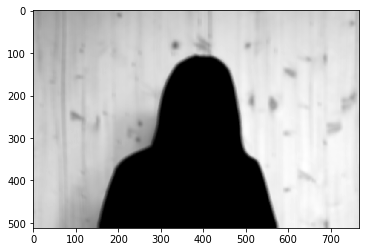

In [196]:
plt.imshow(rgb[1], cmap='gray')

In [201]:
rgb_norm = np.array(rgb)
rgb_norm = rgb_norm.reshape(512, 768,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


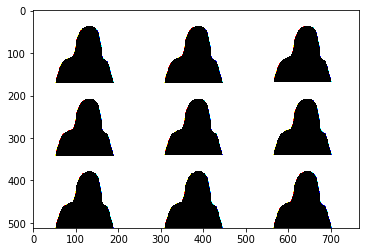

In [202]:
plt.imshow(rgb_norm)

In [154]:
np.absolute(grad)

array([[5804.63102876, 5816.88580097, 5865.81200553, ..., 7379.01412705,
        7496.44117895, 7459.42904958],
       [5817.31878219, 5828.46684963, 5870.16206199, ..., 7387.30494221,
        7502.01599109, 7469.40881835],
       [5825.06452029, 5843.09808738, 5878.99979275, ..., 7395.64173936,
        7517.60646363, 7479.44651709],
       ...,
       [7680.55553623, 7705.25090061, 7715.91414402, ..., 8672.44517513,
        8693.27625942, 8716.09799849],
       [7672.86694321, 7694.22634961, 7707.99674915, ..., 8681.00081556,
        8691.62702668, 8714.54129784],
       [7670.29159484, 7694.7276438 , 7707.1745531 , ..., 8675.29491915,
        8695.74044321, 8715.54306224]])

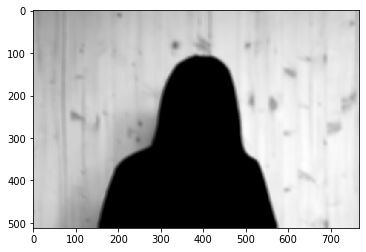

In [119]:
filtered=np.absolute(grad)
plt.imshow(filtered,cmap='gray')

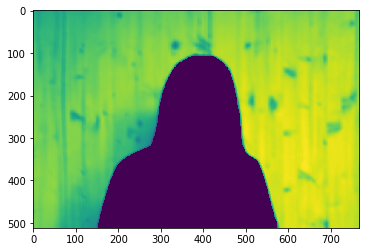

In [120]:
img_filtered = np.array(filtered)
img_filtered[non_black_pixels_mask] = 0
plt.imshow(img_filtered)

In [121]:
img_np_front_2gray=cv2.cvtColor(img_np_front, cv2.COLOR_BGR2GRAY)

In [143]:
num=np.max(img_filtered)/255
img_filt = img_filtered/num
np.max(img_filt)

255.0

In [144]:
img_np_f=img_np_front_2gray
np.max(img_np_f)

250

In [141]:
final=np.add(img_filt,img_np_f)

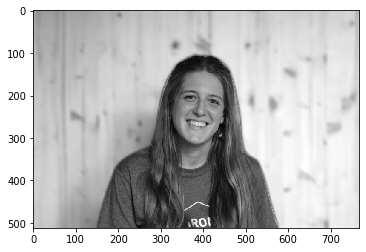

In [142]:
plt.imshow(final,cmap='gray')

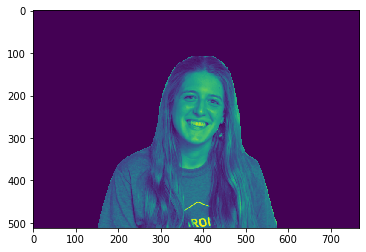

In [77]:
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY))